In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import math
import time

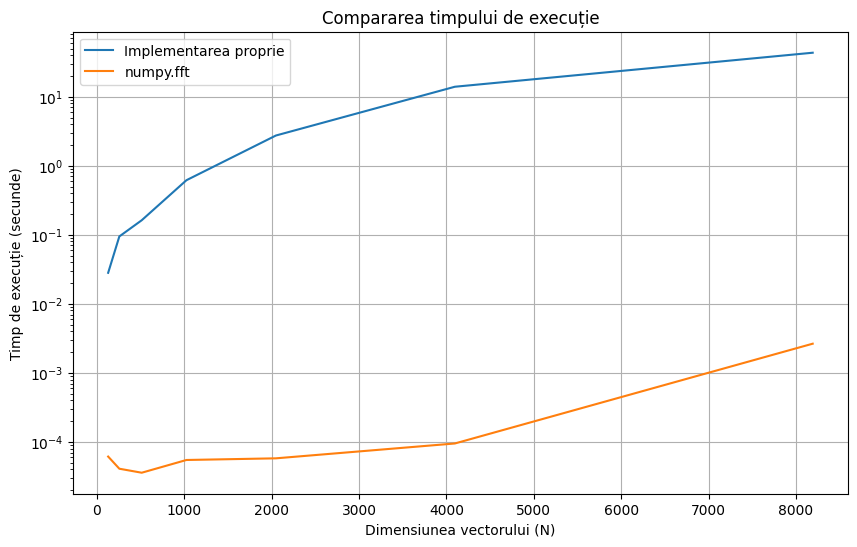

In [3]:
# 1. La laboratorul precedent ati implementat voi Transformata Fourier Discreta. Comparati timpul de executie al implementarii voastre cu numpy.fft.
# Desenati un grafic cu timpii de executie pentru dimensiunile vectorilor
# N ∈ {128, 256, 512, 1024, 2048, 4096, 8192}. Folositi time.time pentru a
# calcula timpul de rulare iar la plot pentru axa Oy afisati ambii timpi pe
# scara logaritmica.
def matrice_Fourier(N):
    F = np.zeros((N, N), dtype=np.complex128)
    for n in range(N):
        for w in range(N):
            F[n, w] = math.e**(-2j * np.pi * n * w / N)
    return (1/np.sqrt(N))*F


f = 3
N = [128, 256, 512, 1024, 2048, 4096, 8192]
time_def = []
time_fft = []
for n in N:
    t = np.linspace(0,1,n)
    signal = np.sin(2*np.pi*f*t)
    start = time.time()
    F = matrice_Fourier(n)
    X = np.dot(F,signal)
    end = time.time()-start
    time_def.append(end)

    start = time.perf_counter()
    X = fft.fft(signal)
    end = time.perf_counter() - start
    time_fft.append(end)

plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.plot(N, time_def, label="Implementarea proprie")
plt.plot(N, time_fft, label="numpy.fft")
plt.xlabel("Dimensiunea vectorului (N)")
plt.ylabel("Timp de execuție (secunde)")
plt.title("Compararea timpului de execuție")
plt.legend()
plt.grid()
plt.savefig("grafice/ex1.pdf", format="pdf")
plt.savefig("grafice/ex1.png", format="png")
plt.show()  


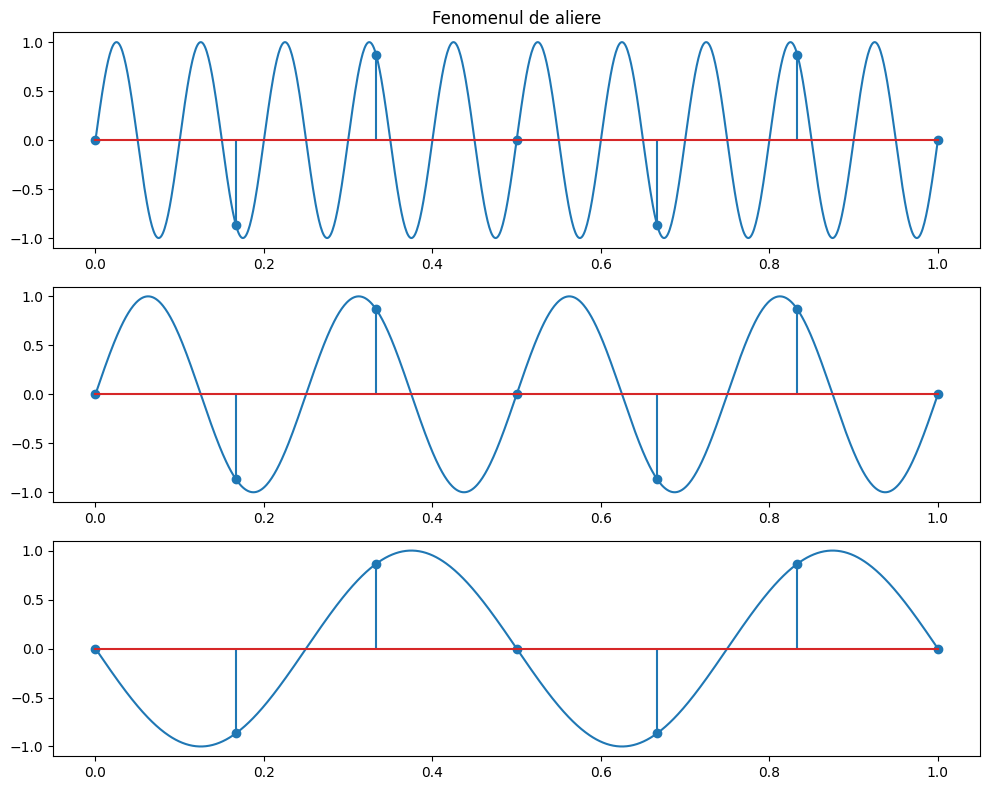

In [4]:
# 2. Construiti un semnal sinusoidal de frecventa aleasa de voi de amplitudine unitara si faza nula. Demonstrati (grafic) ca esantionarea lui cu o
# frecventa sub-Nyquist (aleasa de asemeneade voi) genereaza fenomenul
# de aliere. Pentru aceasta creati alte doua semnale de frecvente diferite
# care esantionate cu frecventa aleasa mai sus produc aceleasi esantioane ca
# semnalul initial. Obtineti astfel o figura similara Figurii 2.


t = np.linspace(0,1,1000)
f = 10
fs = 6
p = np.linspace(0,1,fs+1)
signal = np.sin(2*np.pi*f*t)
signal1  = np.sin(2*np.pi*(f - fs)*t)
signal2  = np.sin(2*np.pi*(f - 2*fs)*t)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes[0].set_title('Fenomenul de aliere')
axes[0].plot(t, signal)
axes[1].plot(t, signal1)
axes[2].plot(t, signal2)

signal = np.sin(2*np.pi*f*p)


axes[0].stem(p,signal)
axes[1].stem(p,signal)
axes[2].stem(p,signal)


plt.tight_layout()
plt.savefig("grafice/ex2.pdf", format="pdf")
plt.savefig("grafice/ex2.png", format="png")
plt.show()



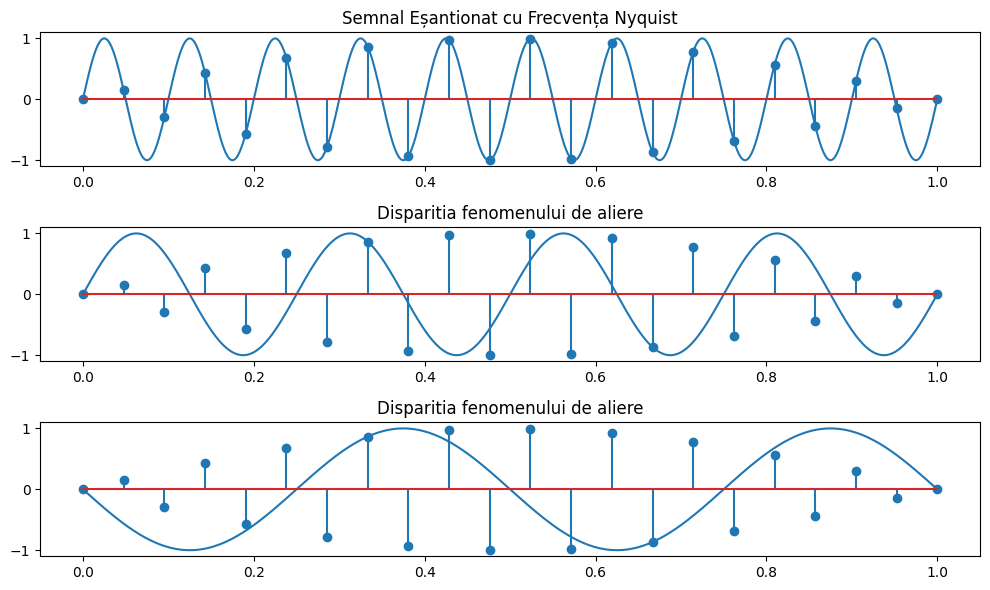

In [5]:
# 3. Demonstrati (grafic) ca alegand o frecventa de esantionare mai mare decat
# frecventa Nyquist nu mai obtineti fenomenul de aliere pentru semnalul
# ales la exercitiul precedent. La fel ca mai sus indicati esantioanele si
# pentru celelalte doua semnale construite.

# Definirea semnalului original
f = 10
fs = 6
timp = np.linspace(0, 1, 1000)  
semnal_original = np.sin(2 * np.pi * f * timp)
signal1  = np.sin(2*np.pi*(f-fs)*timp)
signal2  = np.sin(2*np.pi*(f - 2*fs)*t)

# Frecvența de eșantionare trebuie să fie mai mare decât de 2 ori frecvența maximă
frecventa_esantionare = 2 * f + 1 
timp_esantionat = np.linspace(0, 1, frecventa_esantionare+1)  
semnal_esantionat = np.sin(2 * np.pi * f * timp_esantionat)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(timp, semnal_original)
plt.stem(timp_esantionat, semnal_esantionat)
plt.title("Semnal Eșantionat cu Frecvența Nyquist")

plt.subplot(3, 1, 2)
plt.plot(timp, signal1)
plt.stem(timp_esantionat, semnal_esantionat)
plt.title("Disparitia fenomenului de aliere")

plt.subplot(3, 1, 3)
plt.plot(timp, signal2)
plt.stem(timp_esantionat, semnal_esantionat)
plt.title("Disparitia fenomenului de aliere")


plt.tight_layout()
plt.savefig("grafice/ex3.pdf", format="pdf")
plt.savefig("grafice/ex3.png", format="png")
plt.show()


4. Frecventele emise de un contrabas se incadreaza intre 40Hz si 200Hz. Care
este frecventa minima cu care trebuie esantionat semnalul trece-banda
provenit din inregistrarea instrumentuluiastfel incat semnalul discretizat
sa contina toate componentele de frecventa pe care instrumentul le poate
produce?

    Ca semnalul discretizat (eșantionat) să conțină toate componentele de frecvență emise de un contrabas care se incadreaza intre 40 Hz și 200 Hz, trebuie ca frecventa de esantionare să fie cel putin de doua ori mai mare decat cea mai mare frecventa din semnalul original.
    Frecventa maxima este de 200 Hz => frecvența de eșantionare > 2 * 200 Hz = 400 Hz (din teorema Nyquist) pentru a evita fenomenul de aliasing => frecventa minima  = 401 Hz


5. Da, se pot distinge vocalele pe baza ei
![Screenshot_2023-11-09_15941.png](spectograma_audacity\Screenshot_2023-11-09_15941.png)

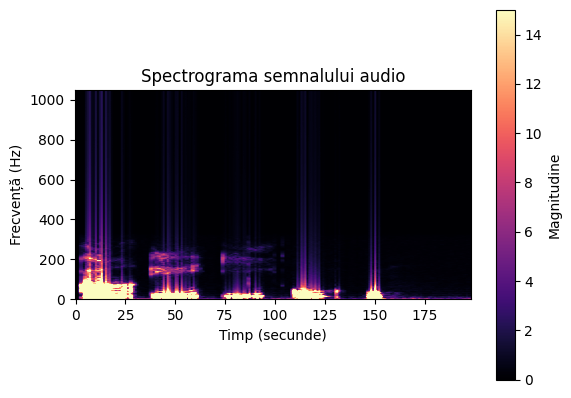

In [6]:
# 6. Pentru vocalele inregistrate anterior desenati voi spectrograma:
# (a) cititi un semnal audio dintr-un fisier (un vector de dimensiune N);
# (b) grupati cate 1% din valorile semnalului impreuna astfel incat sa fie
# si o suprapunere de 50% intre groupuri;
# (c) pentru fiecare grup creat astfel calculati FFT;
# (d) puneti intr-o matrice pe cate o coloana fiecare FFT calculat (cu valoare absoluta);
# (e) afisati matricea intr-o figura (similar cu Figura 1).
from scipy.io import wavfile

fs, signal = wavfile.read('vocale.wav')
# mărimea unui grup de 1% = 1/100 din semnal
group_size = len(signal) // 100
# suprapunerea între grupuri 50% = 1/2
overlap = group_size // 2

groups = []

# gruparea semnalului în grupuri cu suprapunere
for i in range(0, len(signal), overlap):
    group = signal[i:i + group_size]
    if len(group) < group_size:
        break
    groups.append(group)


# calculul FFT
fft_results = []
for group in groups:
    group_fft = np.abs(np.fft.fft(group)) / group_size
    fft_results.append(group_fft[:len(group_fft)//2])

# convertirea listei FFT într-o matrice
fft_matrix = np.column_stack(fft_results)

plt.imshow(fft_matrix, aspect=0.1, origin='lower', cmap='magma', vmin=0,vmax=15)
plt.xlabel('Timp (secunde)')
plt.ylabel('Frecvență (Hz)')
plt.title('Spectrograma semnalului audio')
plt.colorbar(label='Magnitudine')
plt.savefig("grafice/ex6.pdf", format="pdf")
plt.savefig("grafice/ex6.png", format="png")
plt.show()



7.
Formule : 
 - SNR = Psemnal/Pzgomot
 - Reprezentat in dB, raportul devine SNRdB = 10 log10 SNR

  Avem:
  - Psemnal db= 90dB
  - SRNdb = 80dB
  - Pzgomot db= ?
  ----------------    

  SNRdB = 10 log10 SNR

  SNRdB = 10 log10 (Psemnal/Pzgomot)

  SNRdb = 10 log 10 Psemnal - 10 log 10 Pzgomot

  SNRdb = Psemnal db - Pzgomot db

  Pzgomot db = Psemnal db - SNRdb 

  Pzgomot db = 90dB - 80dB
  
  Pzgomot db = 10dB

